In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [8]:
# Load the CSV file into a DataFrame
data = pd.read_csv('sign_mnist_train.csv')

# Extract labels (target variable) from the first column
labels = data.iloc[:, 0].values

# Extract features from the remaining columns
features = data.iloc[:, 1:].values

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=143)

In [9]:
# Normalize pixel values to range [0, 1]
train_features = train_features.astype('float32') / 255.0
test_features = test_features.astype('float32') / 255.0

# Reshape features for CNN input (assuming each feature is a 28x28 pixel image)
train_features = train_features.reshape(train_features.shape[0], 28, 28, 1)
test_features = test_features.reshape(test_features.shape[0], 28, 28, 1)

# Save train and test data and labels as numpy arrays
np.save('train_data.npy', train_features)
np.save('test_data.npy', test_features)
np.save('train_labels.npy', train_labels)
np.save('test_labels.npy', test_labels)

In [10]:
# Create CNN model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Add Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=tf.compat.v1.losses.sparse_softmax_cross_entropy, metrics=['accuracy'])

# Display model architecture
model.summary()

# Train the model
history = model.fit(train_features, train_labels, epochs=10, validation_data=(test_features, test_labels))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 9, 9, 32)          128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          18496     
                                                      

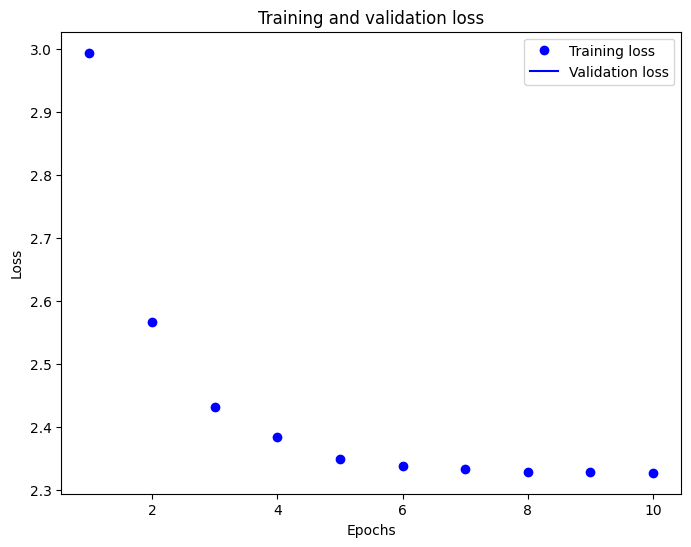

In [11]:
# Plot the loss curves for training and validation.

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

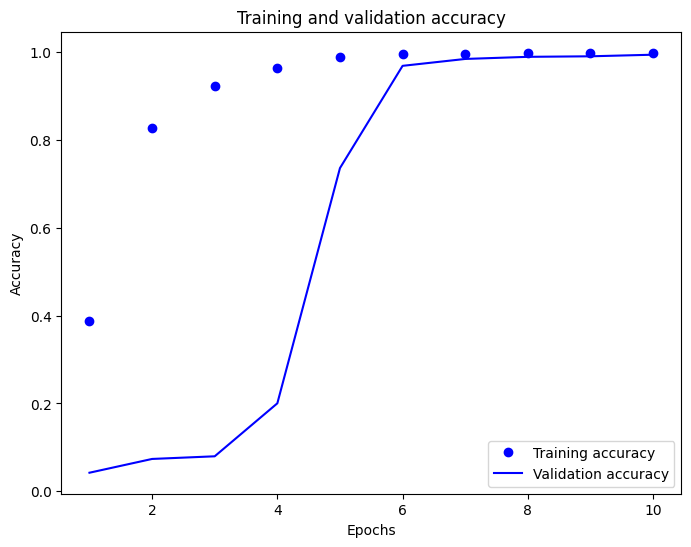

In [12]:
# Plot the accuracy curves for training and validation.

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_features, test_labels)
print("Test accuracy:", test_acc)

26/26 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.9940
Test accuracy: 0.993968665599823


26/26 [==============================] - 0s 10ms/step


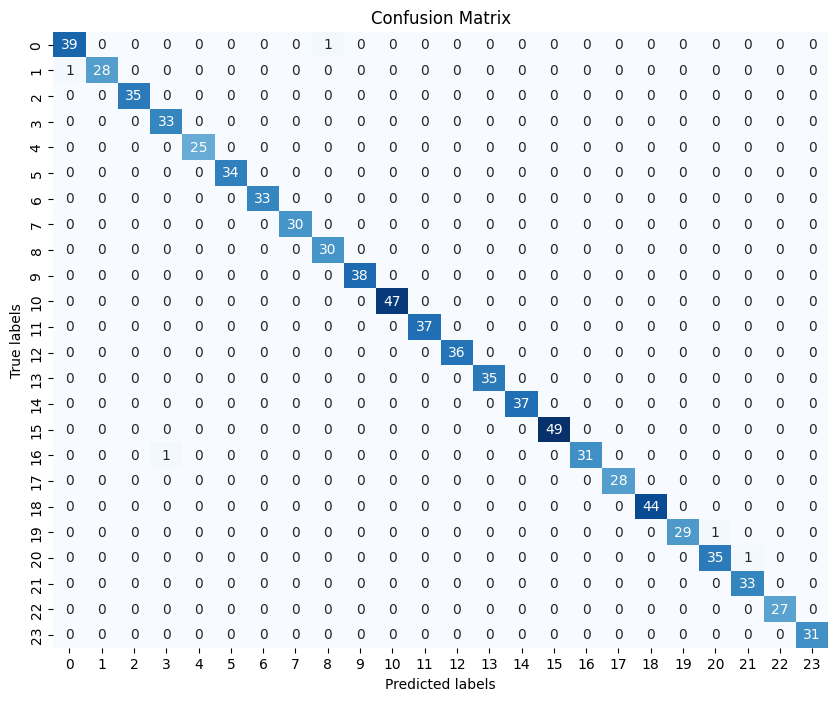

In [14]:
# Plot confusion matrix
test_predictions = np.argmax(model.predict(test_features), axis=-1)
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()